In [46]:
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

You must be using a very recent version of pyLDAvis to use the lda2vec outputs. 
As of this writing, anything past Jan 6 2016 or this commit `14e7b5f60d8360eb84969ff08a1b77b365a5878e` should work.
You can do this quickly by installing it directly from master like so:


In [38]:
# pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis

In [47]:
import pyLDAvis
pyLDAvis.enable_notebook()

### Reading in the saved model topics

After runnning `lda2vec_run.py` script in `examples/twenty_newsgroups/lda2vec` directory a `topics.pyldavis.npz` will be created that contains the topic-to-word probabilities and frequencies. What's left is to visualize and label each topic from the it's prevalent words.

In [48]:
npz = np.load(open('topics_honeypot_clean.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()

In [49]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print msg
    topic_to_topwords[j] = top_words

Topic 0 < 笑 flightgang @gizmodo @msvodou @chan3lissweet gewünscht cooool estresso @juanlarzabal
Topic 1 ☆ ？ apaaan clickthrough _ g_g お zealand sub-20 ^^
Topic 2 円 と お portado teleclass @nseverino losingweight @nefanny tdu frenchman
Topic 3 @@ @_@ @cnn = (; ; ;-) ;) 【 ohehe
Topic 4 qq q1 qb qu qué quê q4 -qq 4q cqc
Topic 5 笑 と ¿ € = â bernd ê gasta graças
Topic 6 # ) ") =) versatility @elliotminor 14.8 ¡ € @sengineland
Topic 7 # ; ;) ;-) (; @immortal_kiss harajuku whatz online- koehler
Topic 8 。 ;) (; ;-) ; ➔ 笑 :') 8:00 ):
Topic 9 ü @cnn @@ @_@ sh*ts ahamakemoneynow 저의 lembur @ashylbowz kami
Topic 10 … » い и の な ｗ < а о
Topic 11 [ 6.0 7.99 e. t.t n.y >.> 2.99 a.m 2.9
Topic 12 :(( 9:00 :x :-p 1:00 :* :-( 4:00 :| :>
Topic 13 い posha ~~~ ~~ sbuk arsenio wqwqwq skywalker ” @cynthiatenggara
Topic 14 cordless auge coli web20 ➔ 鳳繚蘭学園繚蘭会 @ricaperrone spamming brontosaurus @sakaime
Topic 15 =( (= ( é á ó p/ 1/4 // ///
Topic 16 smarter turu reit qué cqc q4 -qq qb bbq qu
Topic 17 открыл goedkoop 

### Visualize topics

In [50]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, sort_topics=False)

In [51]:
pyLDAvis.display(prepared_data)

### 'True' topics

The 20 newsgroups dataset is interesting because users effetively classify the topics by posting to a particular newsgroup. This lets us qualitatively check our unsupervised topics with the 'true' labels. For example, the four topics we highlighted above are intuitively close to comp.graphics, sci.med, talk.politics.misc, and sci.space.

    comp.graphics
    comp.os.ms-windows.misc
    comp.sys.ibm.pc.hardware
    comp.sys.mac.hardware
    comp.windows.x    
    rec.autos
    rec.motorcycles
    rec.sport.baseball
    rec.sport.hockey    
    sci.crypt
    sci.electronics
    sci.med
    sci.space
    misc.forsale    
    talk.politics.misc
    talk.politics.guns
    talk.politics.mideast    
    talk.religion.misc
    alt.atheism
    soc.religion.christian

### Individual document topics

In [10]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

#### First Example

In [11]:
print texts[1]

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.


In [62]:
import pandas as pd
grouped_df = pd.read_csv("tweets_shuffled_no_links.csv", delimiter="\t",names=["user_id","tweet_id", "tweet","created_at", "tweet_no_links"])
grouped_df = grouped_df.groupby(["user_id"])

In [65]:
for name,group in grouped_df:
    print(group)
    break

        user_id    tweet_id  \
2089        614  5900351610   
144128      614  5569032101   
157657      614  5567903378   
178019      614  5290375380   
206100      614  5611349625   
216311      614  5291252160   
251180      614  5221141008   
258395      614  5808480110   
300119      614  5196461908   
317862      614  5205651441   
398021      614  5204144151   
404304      614  5777382317   
411270      614  5569578202   
415321      614  5882627868   
421812      614  5703029061   
424645      614  5712623515   
434466      614  5560406687   
456127      614  5690075659   
458585      614  5621782156   
471465      614  5526656644   
489974      614  5259777376   
922430      614  5619878938   
974361      614  5560716079   
1021444     614  5588847470   
1027280     614  5293670906   
1028278     614  5202269012   
1028581     614  5580014470   
1031196     614  5252712695   
1053842     614  5766455604   
1063584     614  5715327000   
...         ...         ...   
4478108 

In [35]:
texts[6]

array(['14088485', '7427500617',
       'UUCOC Conversations \xc2\xbb Blog Archive \xc2\xbb What is Happiness..n essay ... http://bit.ly/8XLqlP',
       '2010-01-05 21:30:50'], 
      dtype='|S420')

In [68]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][2]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text.encode("utf-8"))

05% in topic 00 which has top words <, 笑, flightgang, @gizmodo, @msvodou, @chan3lissweet, gewünscht, cooool, estresso, @juanlarzabal
05% in topic 01 which has top words ☆, ？, apaaan, clickthrough, _, g_g, お, zealand, sub-20, ^^
05% in topic 02 which has top words 円, と, お, portado, teleclass, @nseverino, losingweight, @nefanny, tdu, frenchman
04% in topic 03 which has top words @@, @_@, @cnn, =, (;, ;, ;-), ;), 【, ohehe
05% in topic 04 which has top words qq, q1, qb, qu, qué, quê, q4, -qq, 4q, cqc
05% in topic 05 which has top words 笑, と, ¿, €, =, â, bernd, ê, gasta, graças
04% in topic 06 which has top words #, ), "), =), versatility, @elliotminor, 14.8, ¡, €, @sengineland
05% in topic 07 which has top words #, ;, ;), ;-), (;, @immortal_kiss, harajuku, whatz, online-, koehler
04% in topic 08 which has top words 。, ;), (;, ;-), ;, ➔, 笑, :'), 8:00, ):
04% in topic 09 which has top words ü, @cnn, @@, @_@, sh*ts, ahamakemoneynow, 저의, lembur, @ashylbowz, kami
05% in topic 10 which has top w

In [69]:
dat['doc_topic_dists'][0]

array([ 0.05019772,  0.05012316,  0.0498868 ,  0.05016661,  0.05006159,
        0.05011173,  0.0497506 ,  0.04974818,  0.05008939,  0.04989747,
        0.04983712,  0.04999069,  0.05042342,  0.04966808,  0.05044089,
        0.0502463 ,  0.04983728,  0.04971997,  0.04959476,  0.05020818], dtype=float32)

<Container object of 20 artists>

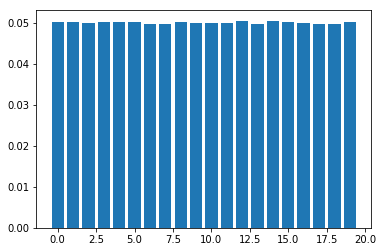

In [70]:
plt.bar(np.arange(20), dat['doc_topic_dists'][0])

#### Second Example

In [19]:
print texts[51]

I have been following this thread on talk.religion,
soc.religion.christian.bible-study and here with interest.  I am amazed at
the different non-biblical argument those who oppose the Sabbath present. 

One question comes to mind, especially since my last one was not answered
from Scripture.  Maybe clh may wish to provide the first response.

There is a lot of talk about the Sabbath of the TC being ceremonial. 
Answer this:

Since the TC commandments is one law with ten parts on what biblical
basis have you decided that only the Sabbath portion is ceremonial?
OR You say that the seventh-day is the Sabbath but not applicable to
Gentile Christians.  Does that mean the Sabbath commandment has been
annulled?  References please.

If God did not intend His requirements on the Jews to be applicable to
Gentile Christians why did He make it plain that the Gentiles were now
grafted into the commonwealth of Israel?

Darius


In [20]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][51]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text)

26% in topic 01 which has top words out_of_vocabulary, revelation, homosexuality, worship, god, passages, christian, contradict, jesus, islam
04% in topic 02 which has top words <SKIP>, colormap, window, echo, alt.atheism, font, widget, out_of_vocabulary, xt, xlib
01% in topic 03 which has top words out_of_vocabulary, gainey, devils, sox, gilmour, leafs, rbi, lopez, winner, hawks
04% in topic 04 which has top words out_of_vocabulary, war, government, nuclear, administration, reform, bush, bosnia, attack, citizenship
28% in topic 09 which has top words out_of_vocabulary, revelation, homosexuality, worship, god, jesus, passages, christian, contradict, church
32% in topic 19 which has top words out_of_vocabulary, revelation, homosexuality, god, passages, jesus, christian, worship, church, contradict


<Container object of 20 artists>

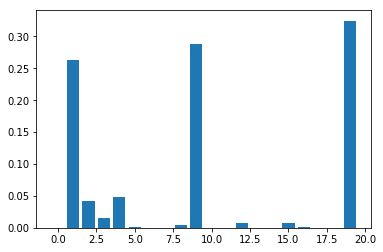

In [21]:
plt.bar(np.arange(20), dat['doc_topic_dists'][51])